# Dataton Aiffel
* Group : EagleAI
* Dataset : 영화관 입장권 통합 전산망
* Name : 김용훈(Kim yonghun)

## Contents

1. Import libraries & load dataset
2. Data PDA
3. Data preprocessing
4. Visualization of first idea

## 1. Import libraries & load dataset

* if want to show korean on matplotlib, command annotation lines on termianl 
* set kor font in matplotlib using 'rc' function (나눔 고딕)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='AppleGothic')


* load dataset
* show dataset shape and head

In [2]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()
result = data.dtypes

(26197, 18)


## 2. Data PDA

* Check how many rows have null values.
* Visualization counts of null values in rows

Counts of rows having null values : 25179
Counts of rows having null values over 4 : 238


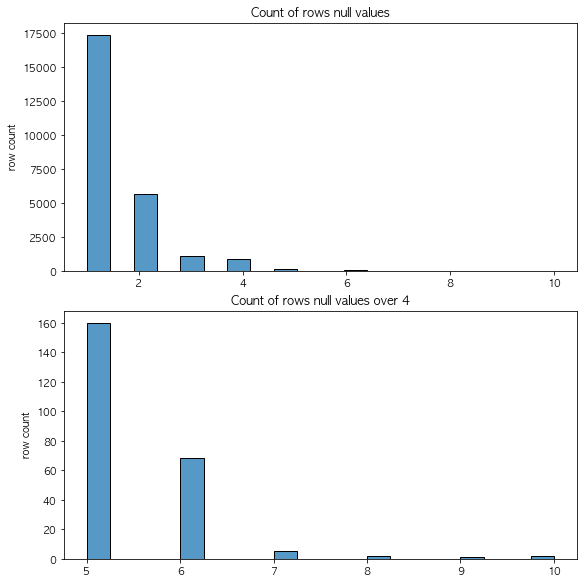

In [3]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("Counts of rows having null values :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("Counts of rows having null values over 4 :", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("Count of rows null values")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('row count')
ax[1].set_title("Count of rows null values over 4")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('row count')

plt.show()

* Delete rows having over 5 null values(78 count)

In [4]:
data_null = data_null[data_null.values > 5]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 78


* Check which columns have null values.

In [5]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

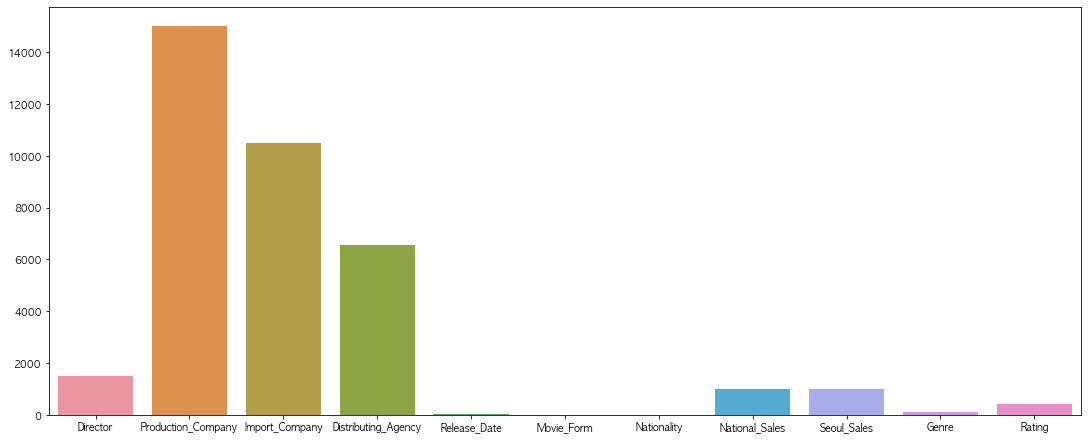

In [6]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
# data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)

plt.show()

## 3. Data preprocessing

1. Divides by whether column will contain numeric or string.
   - numeric : 'ID','National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience'
   - datetime : Release_date
   - string : other columns
2. Data preprocessing numeric columns
3. Data preprocessing string columns

Fill null value with '0' in numeric_columns have string values

In [7]:
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isna().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

Change column value type to integer

In [8]:
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int')


In [9]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")


data['year'] = data['Release_Date'].dt.year
data['month'] = data['Release_Date'].dt.month
data['day'] = data['Release_Date'].dt.day

In [10]:
result = data.dtypes
print(result)

ID                                  int64
Movie_Name                         object
Director                           object
Production_Company                 object
Import_Company                     object
Distributing_Agency                object
Release_Date               datetime64[ns]
Movie_Type                         object
Movie_Form                         object
Nationality                        object
National_number_screens             int64
National_Sales                      int64
National_Audience                   int64
Seoul_Sales                         int64
Seoul_Audience                      int64
Genre                              object
Rating                             object
Movie_Classification               object
year                              float64
month                             float64
day                               float64
dtype: object


In [11]:
# String null columns
string_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
data[string_columns].isnull().sum()

Director                1499
Production_Company     15002
Import_Company         10477
Distributing_Agency     6573
Release_Date              18
Movie_Form                 8
Nationality                4
Genre                    121
Rating                   413
dtype: int64

# graphs of every country according to 'National_Audience', 'National_number_screens', 'National_Sales','National_Audience', 'Seoul_Sales', 'Seoul_Audience' 

[Text(0.5, 0, 'Nationality'), Text(0, 0.5, 'movie quantity')]

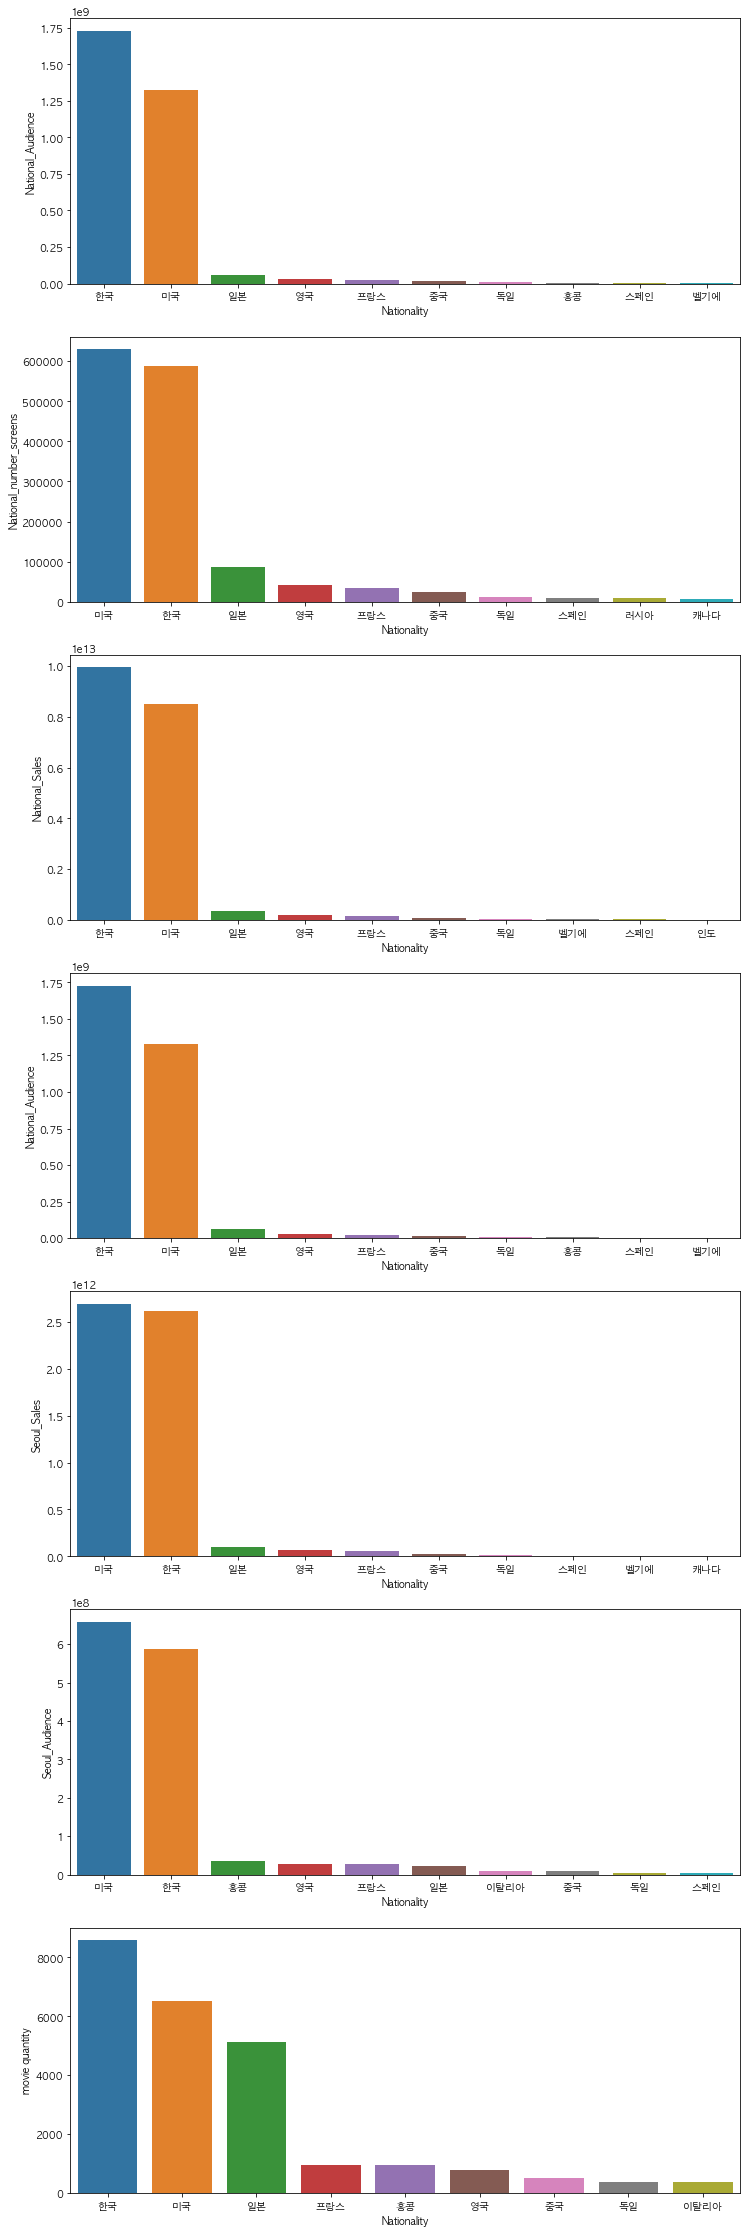

In [12]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(nrows=7)
fig.set_size_inches(12,40)
for i,df in enumerate(['National_Audience', 'National_number_screens', 'National_Sales',
       'National_Audience', 'Seoul_Sales', 'Seoul_Audience']):
        Aggregated=data.groupby('Nationality')[f'{df}'].sum()
        Sorted=pd.DataFrame(Aggregated, columns=[f'{df}']).sort_values(by=[f'{df}'],ascending=False).reset_index()
       #  print(Sorted)

        sns.barplot(data=Sorted[:10],x="Nationality",y=f'{df}',ax=ax[i])
        ax[i].set(xlabel='Nationality', ylabel=f'{df}')

sns.countplot(x='Nationality', data=data,  order = data['Nationality'].value_counts().iloc[:9].index,ax=ax[6])
ax[6].set(xlabel='Nationality', ylabel='movie quantity')



Name Genre: ['사극' 'SF' '드라마' '코미디' '액션' '전쟁' '어드벤처' '판타지' '애니메이션' '범죄' '서부극(웨스턴)'
 '멜로/로맨스' '스릴러' '미스터리' '가족' '다큐멘터리' '공포(호러)' '뮤지컬' '기타' nan '성인물(에로)' '공연']
Name Rating: ['15세이상관람가' '12세이상관람가' '12세관람가' '15세관람가' '전체관람가' '18세관람가'
 '15세 미만인 자는 관람할 수 없는 등급' '청소년관람불가' '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가'
 '15세관람가,15세이상관람가' '고등학생이상관람가,15세이상관람가' '12세 미만인 자는 관람할 수 없는 등급'
 '중학생이상관람가' '12세이상관람가,중학생이상관람가' '15세이상관람가,중학생이상관람가' '고등학생이상관람가' '연소자관람불가'
 '연소자관람가' '연소자관람가,전체관람가' '미성년자관람불가' '12세이상관람가,연소자관람가,전체관람가'
 '12세이상관람가,12세관람가' '모든 관람객이 관람할 수 있는 등급' '12세이상관람가,전체관람가'
 '18세 미만인 자는 관람할 수 없는 등급' nan '연소자관람불가,청소년관람불가' '국민학생관람불가' '미성년자관람가'
 '12세이상관람가,국민학생관람불가' '12세이상관람가,국민학생관람불가,15세이상관람가' '청소년관람불가,15세이상관람가'
 '12세이상관람가,연소자관람가' '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급' '국민학생관람불가,중학생이상관람가'
 '18세관람가,청소년관람불가' '국민학생관람불가,15세이상관람가' '18세관람가,15세이상관람가' '연소자관람불가,15세이상관람가'
 '모든 관람객이 관람할 수 있는 등급,전체관람가' '청소년관람불가,전체관람가' '15세이상관람가,미성년자관람불가'
 '국민학생관람불가,청소년관람불가' '미정' '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급'
 '연소자관람가,15세이상관람가' '청소년관람불가,12세관람

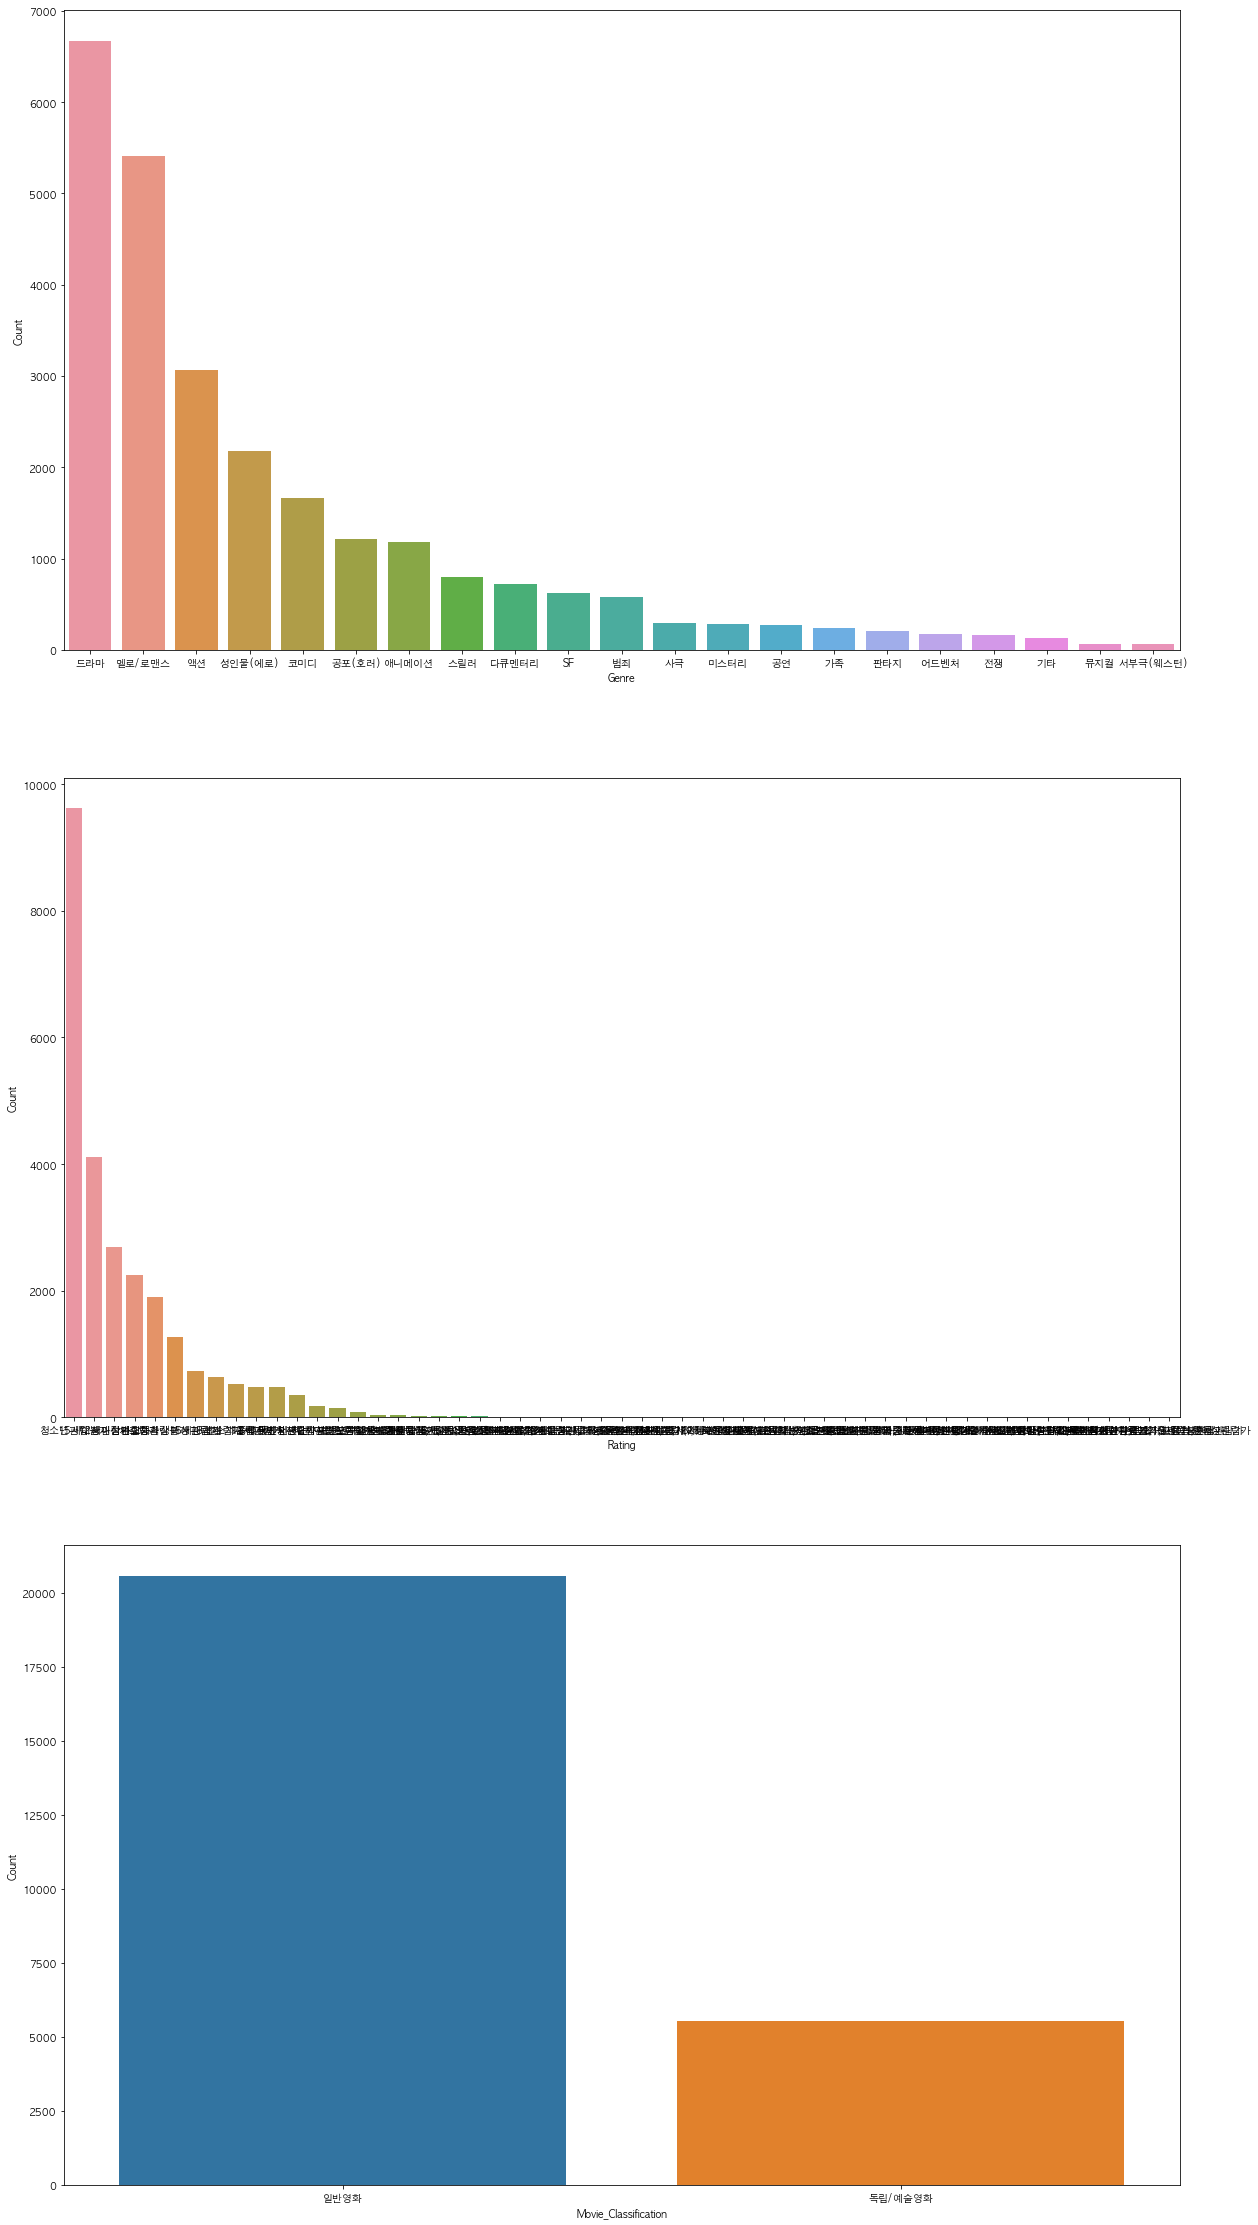

In [13]:
fig,ax= plt.subplots(nrows=3)
fig.set_size_inches(20,40)
for i,df in enumerate([  'Genre', 'Rating','Movie_Classification']):
       print(f'Name {df}:',data[f'{df}'].unique())

       sns.countplot(x=f'{df}', data=data,  order = data[f'{df}'].value_counts().index, ax=ax[i])
       ax[i].set(xlabel=f'{df}', ylabel='Count')

# Genre graphs from popular 9 countries

In [14]:
movie_countries= data['Nationality'].value_counts().iloc[:9]
countries=movie_countries.index.to_list()

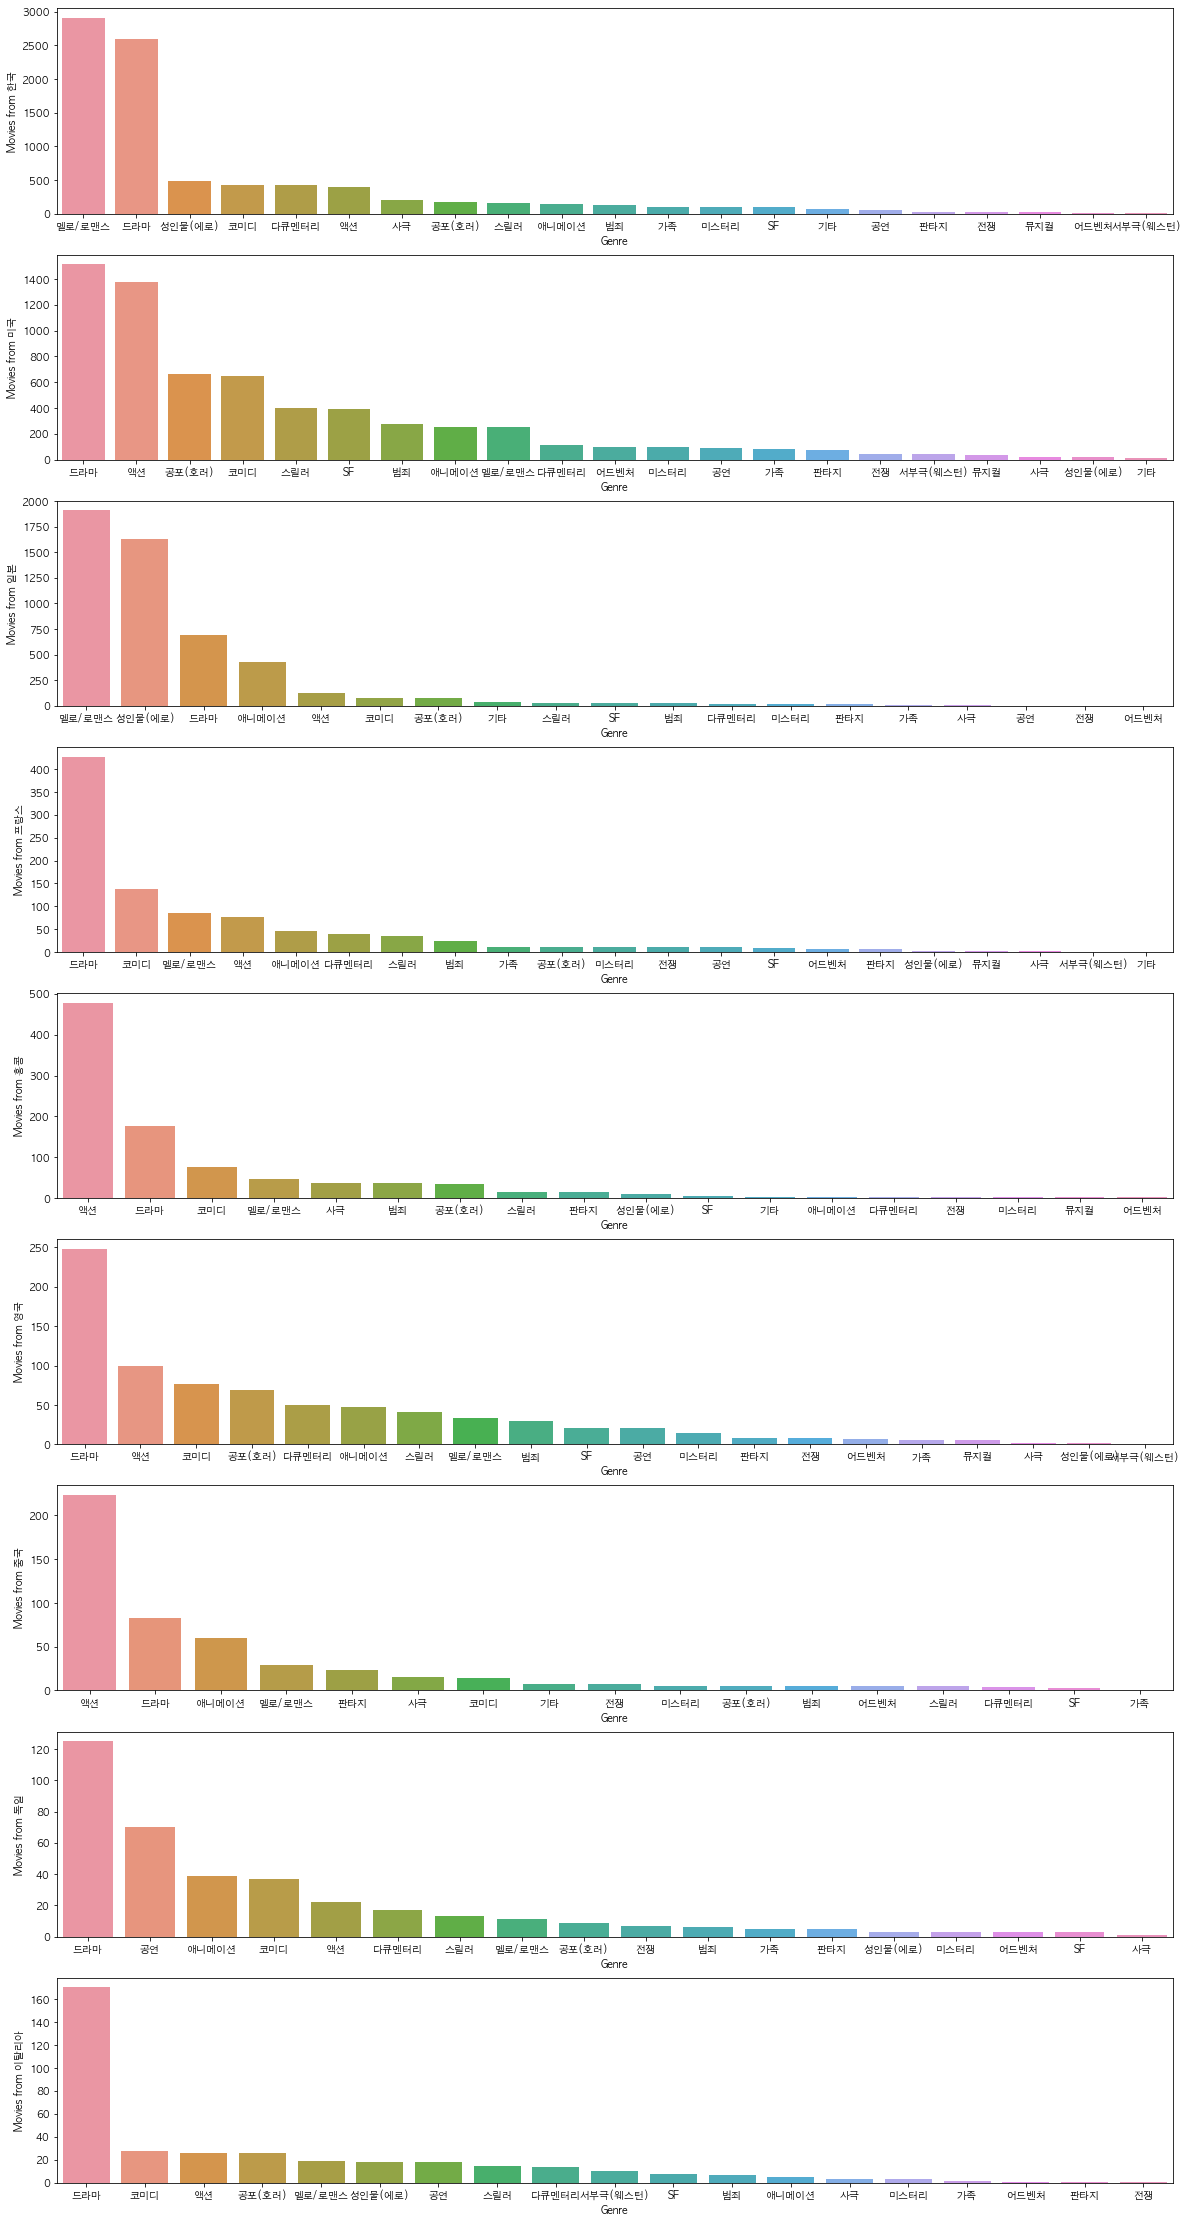

In [15]:
# ax[6].set(xlabel='Nationality', ylabel='movie quantity')
fig, ax = plt.subplots(nrows=len(countries))
fig.set_size_inches(20,40)

for i,country in enumerate(countries):
    data_country=data[data['Nationality']==country]
    sns.countplot(x='Genre', data=data_country,order = data_country['Genre'].value_counts().index,ax=ax[i])
    ax[i].set(ylabel='Movies from '+country)


<AxesSubplot:xlabel='Genre', ylabel='count'>

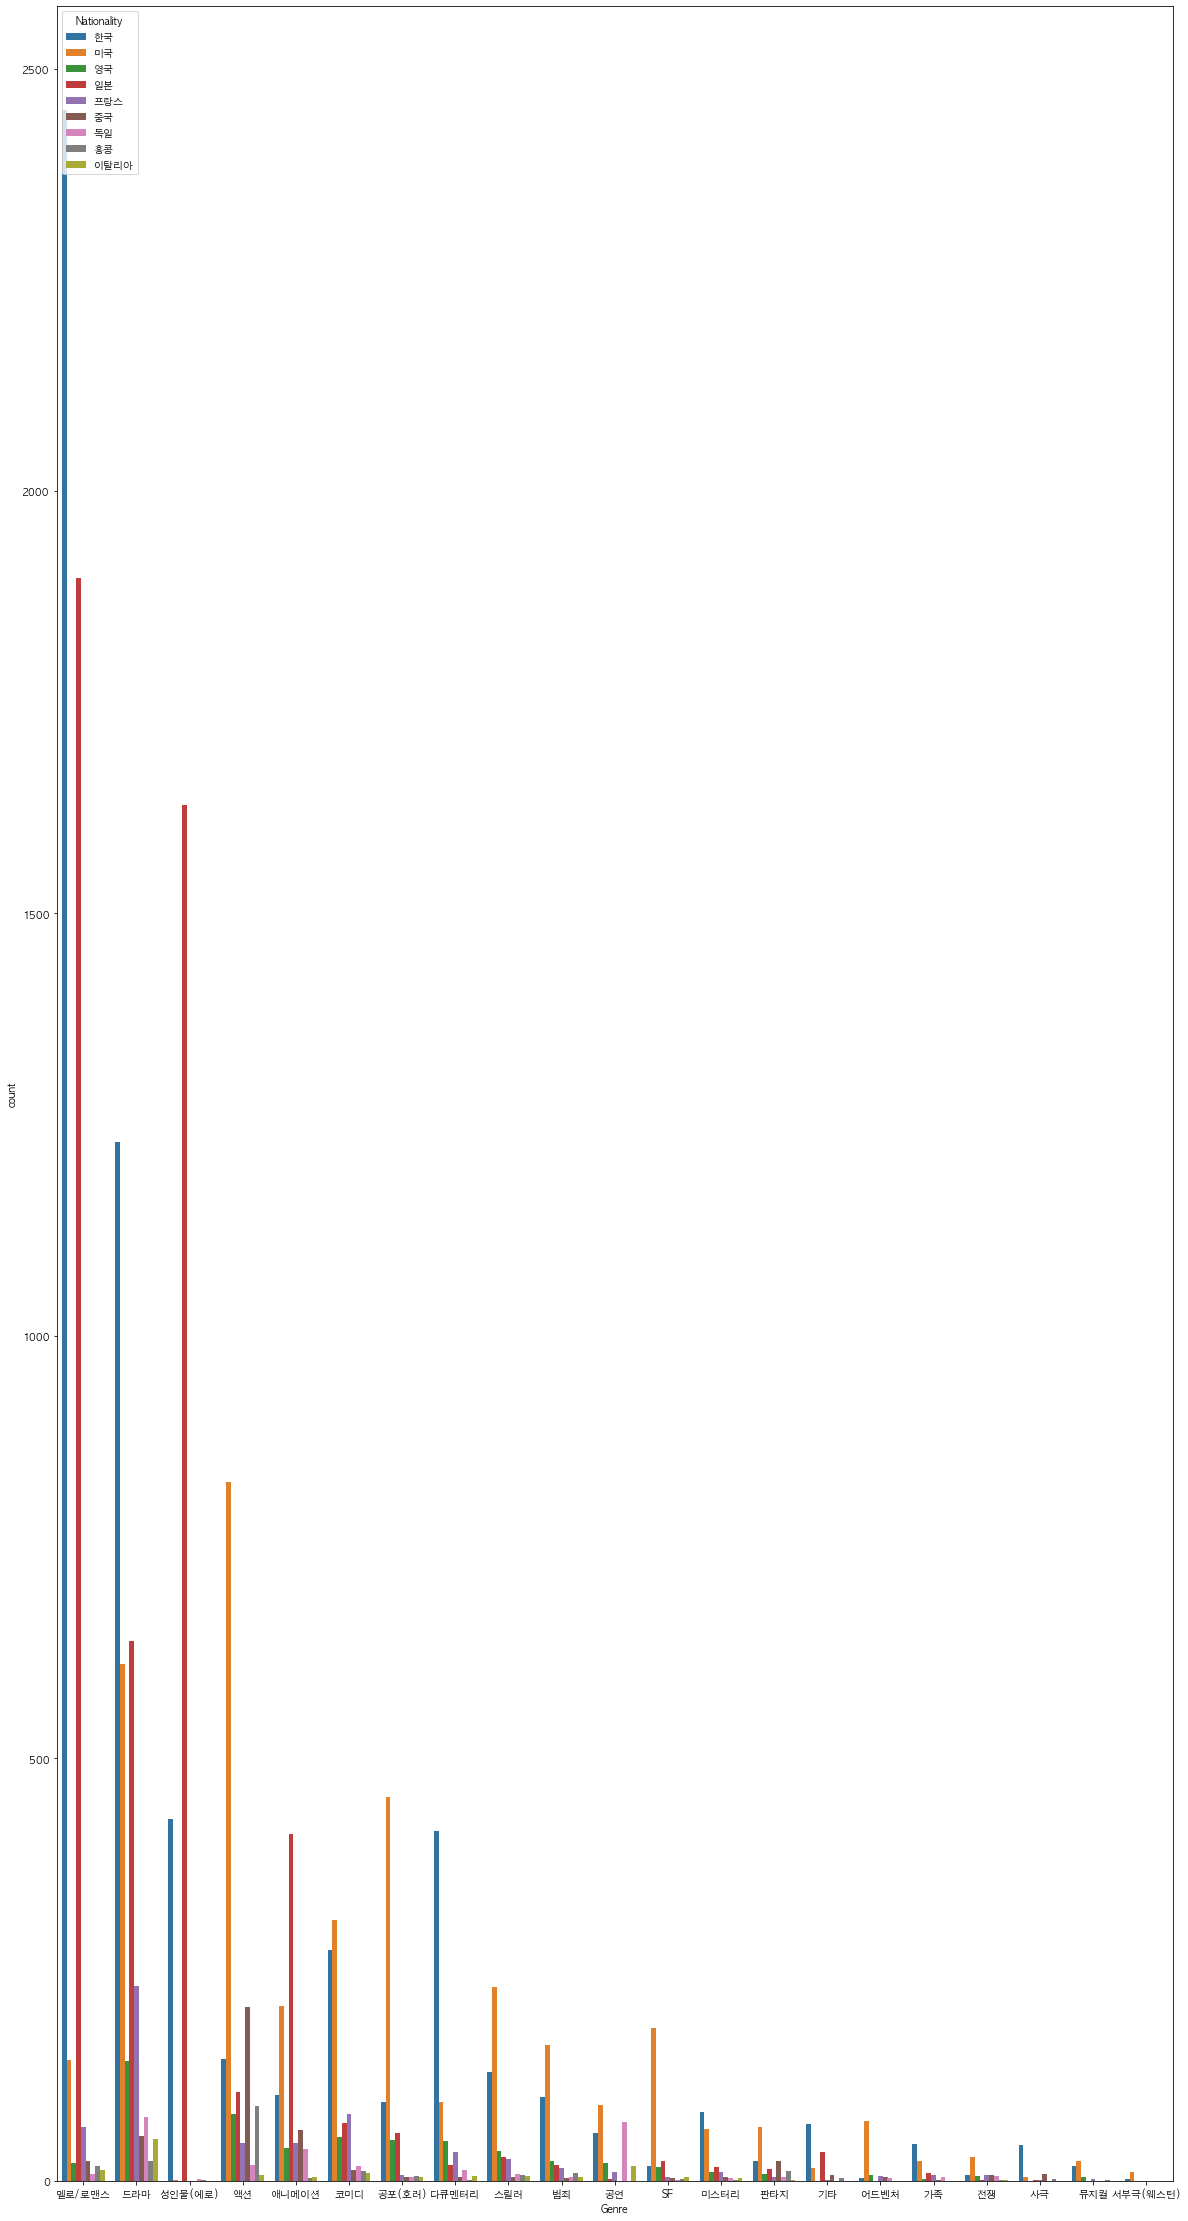

In [29]:
# ax[6].set(xlabel='Nationality', ylabel='movie quantity')
# fig, ax = plt.subplots(nrows=len(countries))

# for i,country in enumerate(countries):
#     data_country=data[data['Nationality']==country]
#     sns.countplot(x='Genre', data=data_country,order = data_country['Genre'].value_counts().index,ax=ax[i])
#     ax[i].set(ylabel='Movies from '+country)

fig, ax = plt.subplots()
fig.set_size_inches(20,40)

data_country=data[(data["Nationality"].isin(countries) ) &  (data["year"] > 2005)]
# sns.lineplot(data=data_country, x="Genre", y="National_Sales",hue="Nationality")
sns.countplot(x='Genre', data=data_country,order = data_country['Genre'].value_counts().index,hue="Nationality", ax=ax)



# top movies in the top movie country list

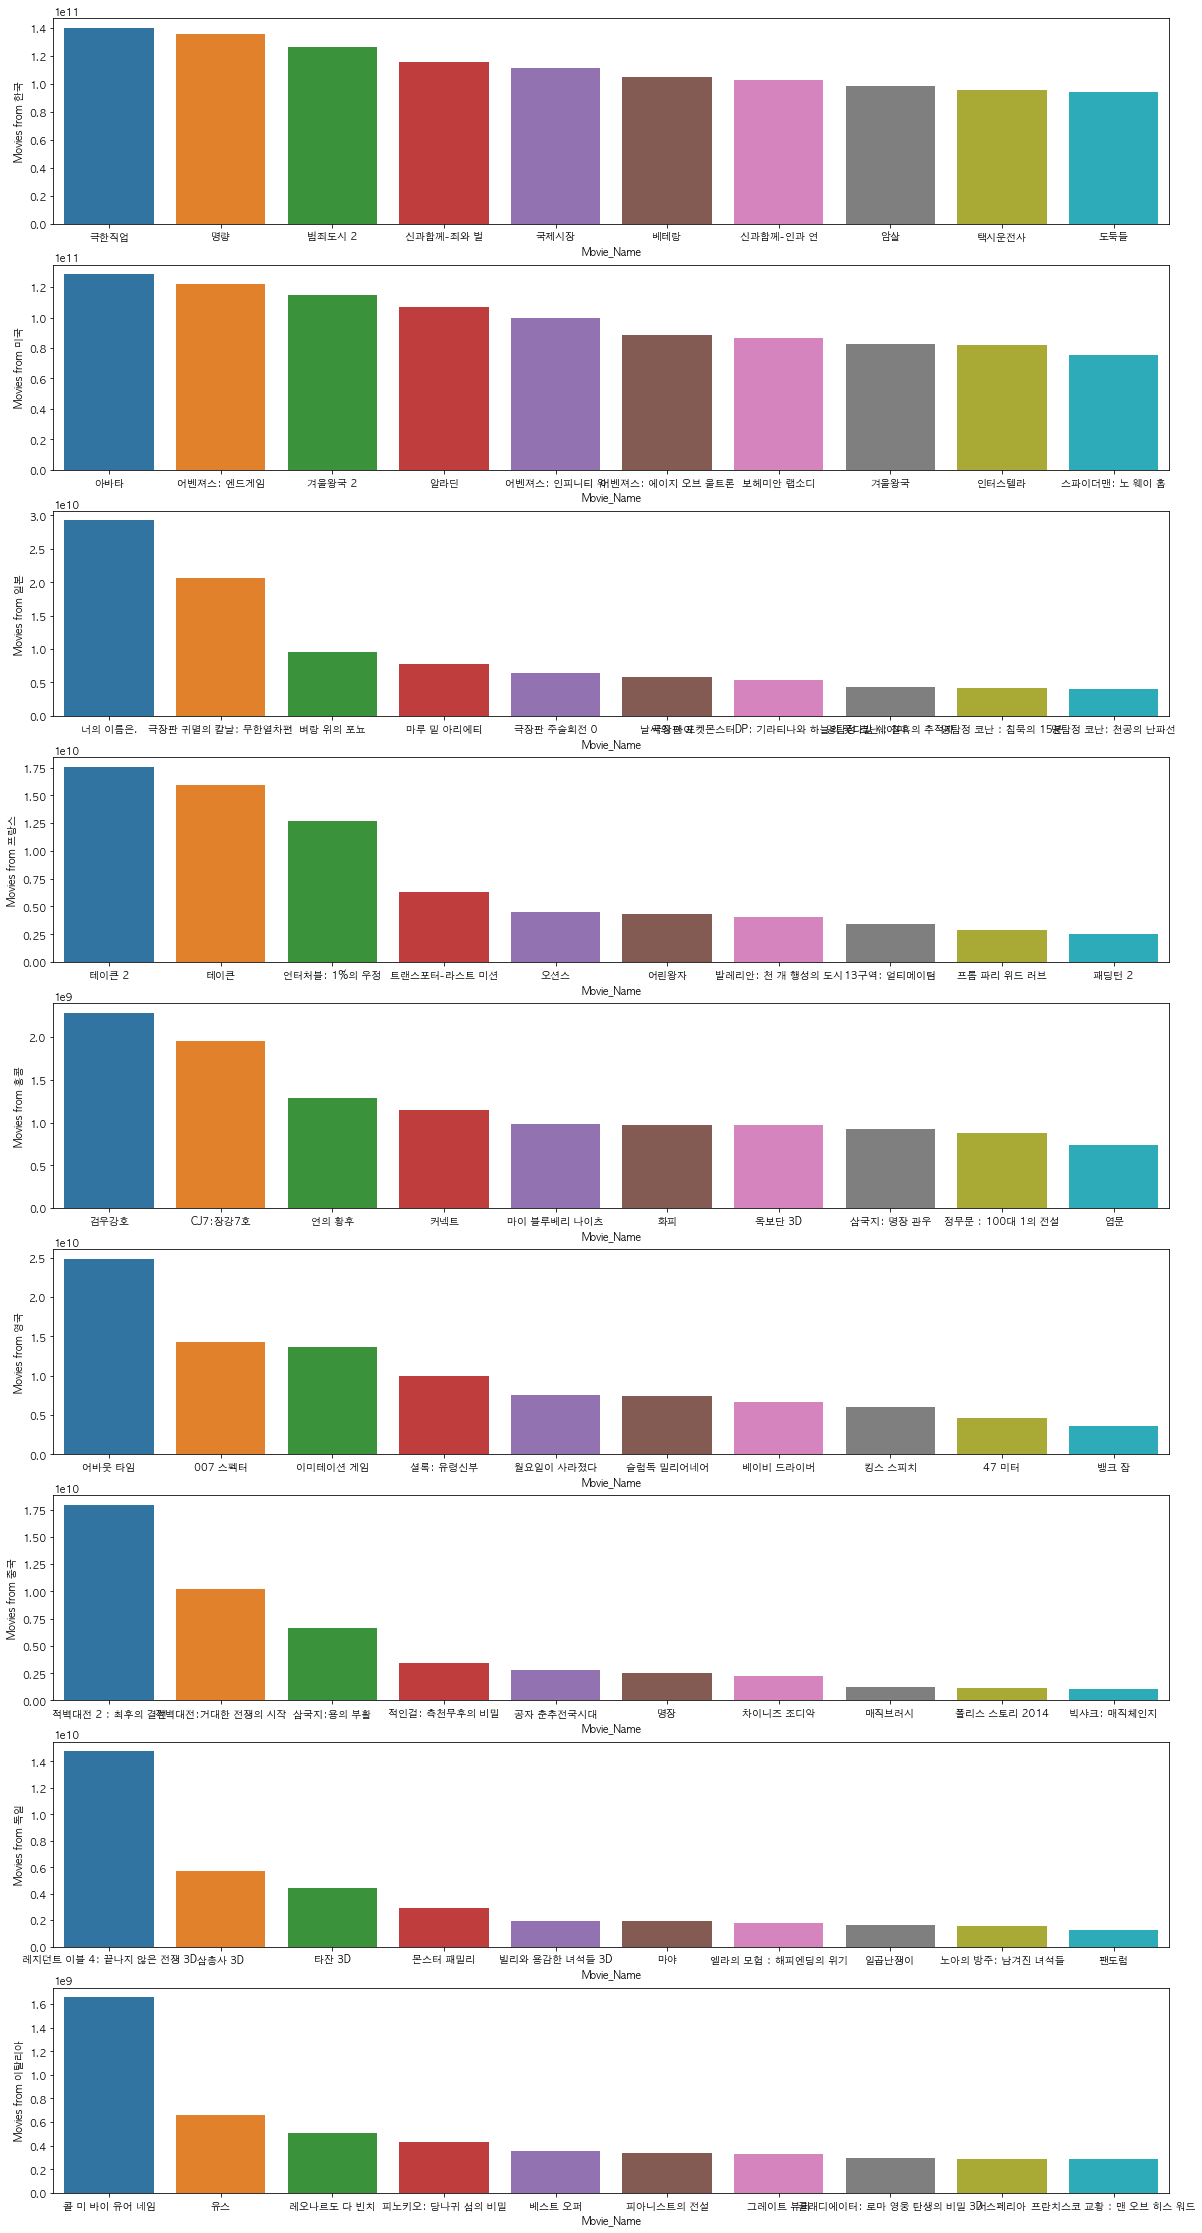

In [18]:
# ax[6].set(xlabel='Nationality', ylabel='movie quantity')
fig, ax = plt.subplots(nrows=len(countries))
fig.set_size_inches(20,40)

for i,country in enumerate(countries):
    data_country=data[data['Nationality']==country]
    data_country=data_country[['Movie_Name','National_Sales']].sort_values(["National_Sales"], ascending=False).iloc[0:10]
    sns.barplot(x="Movie_Name", y="National_Sales", data=data_country,ax=ax[i],orient='v')
    ax[i].set(ylabel='Movies from '+country)

# top movie country's popular word in top movies

KeyboardInterrupt: 

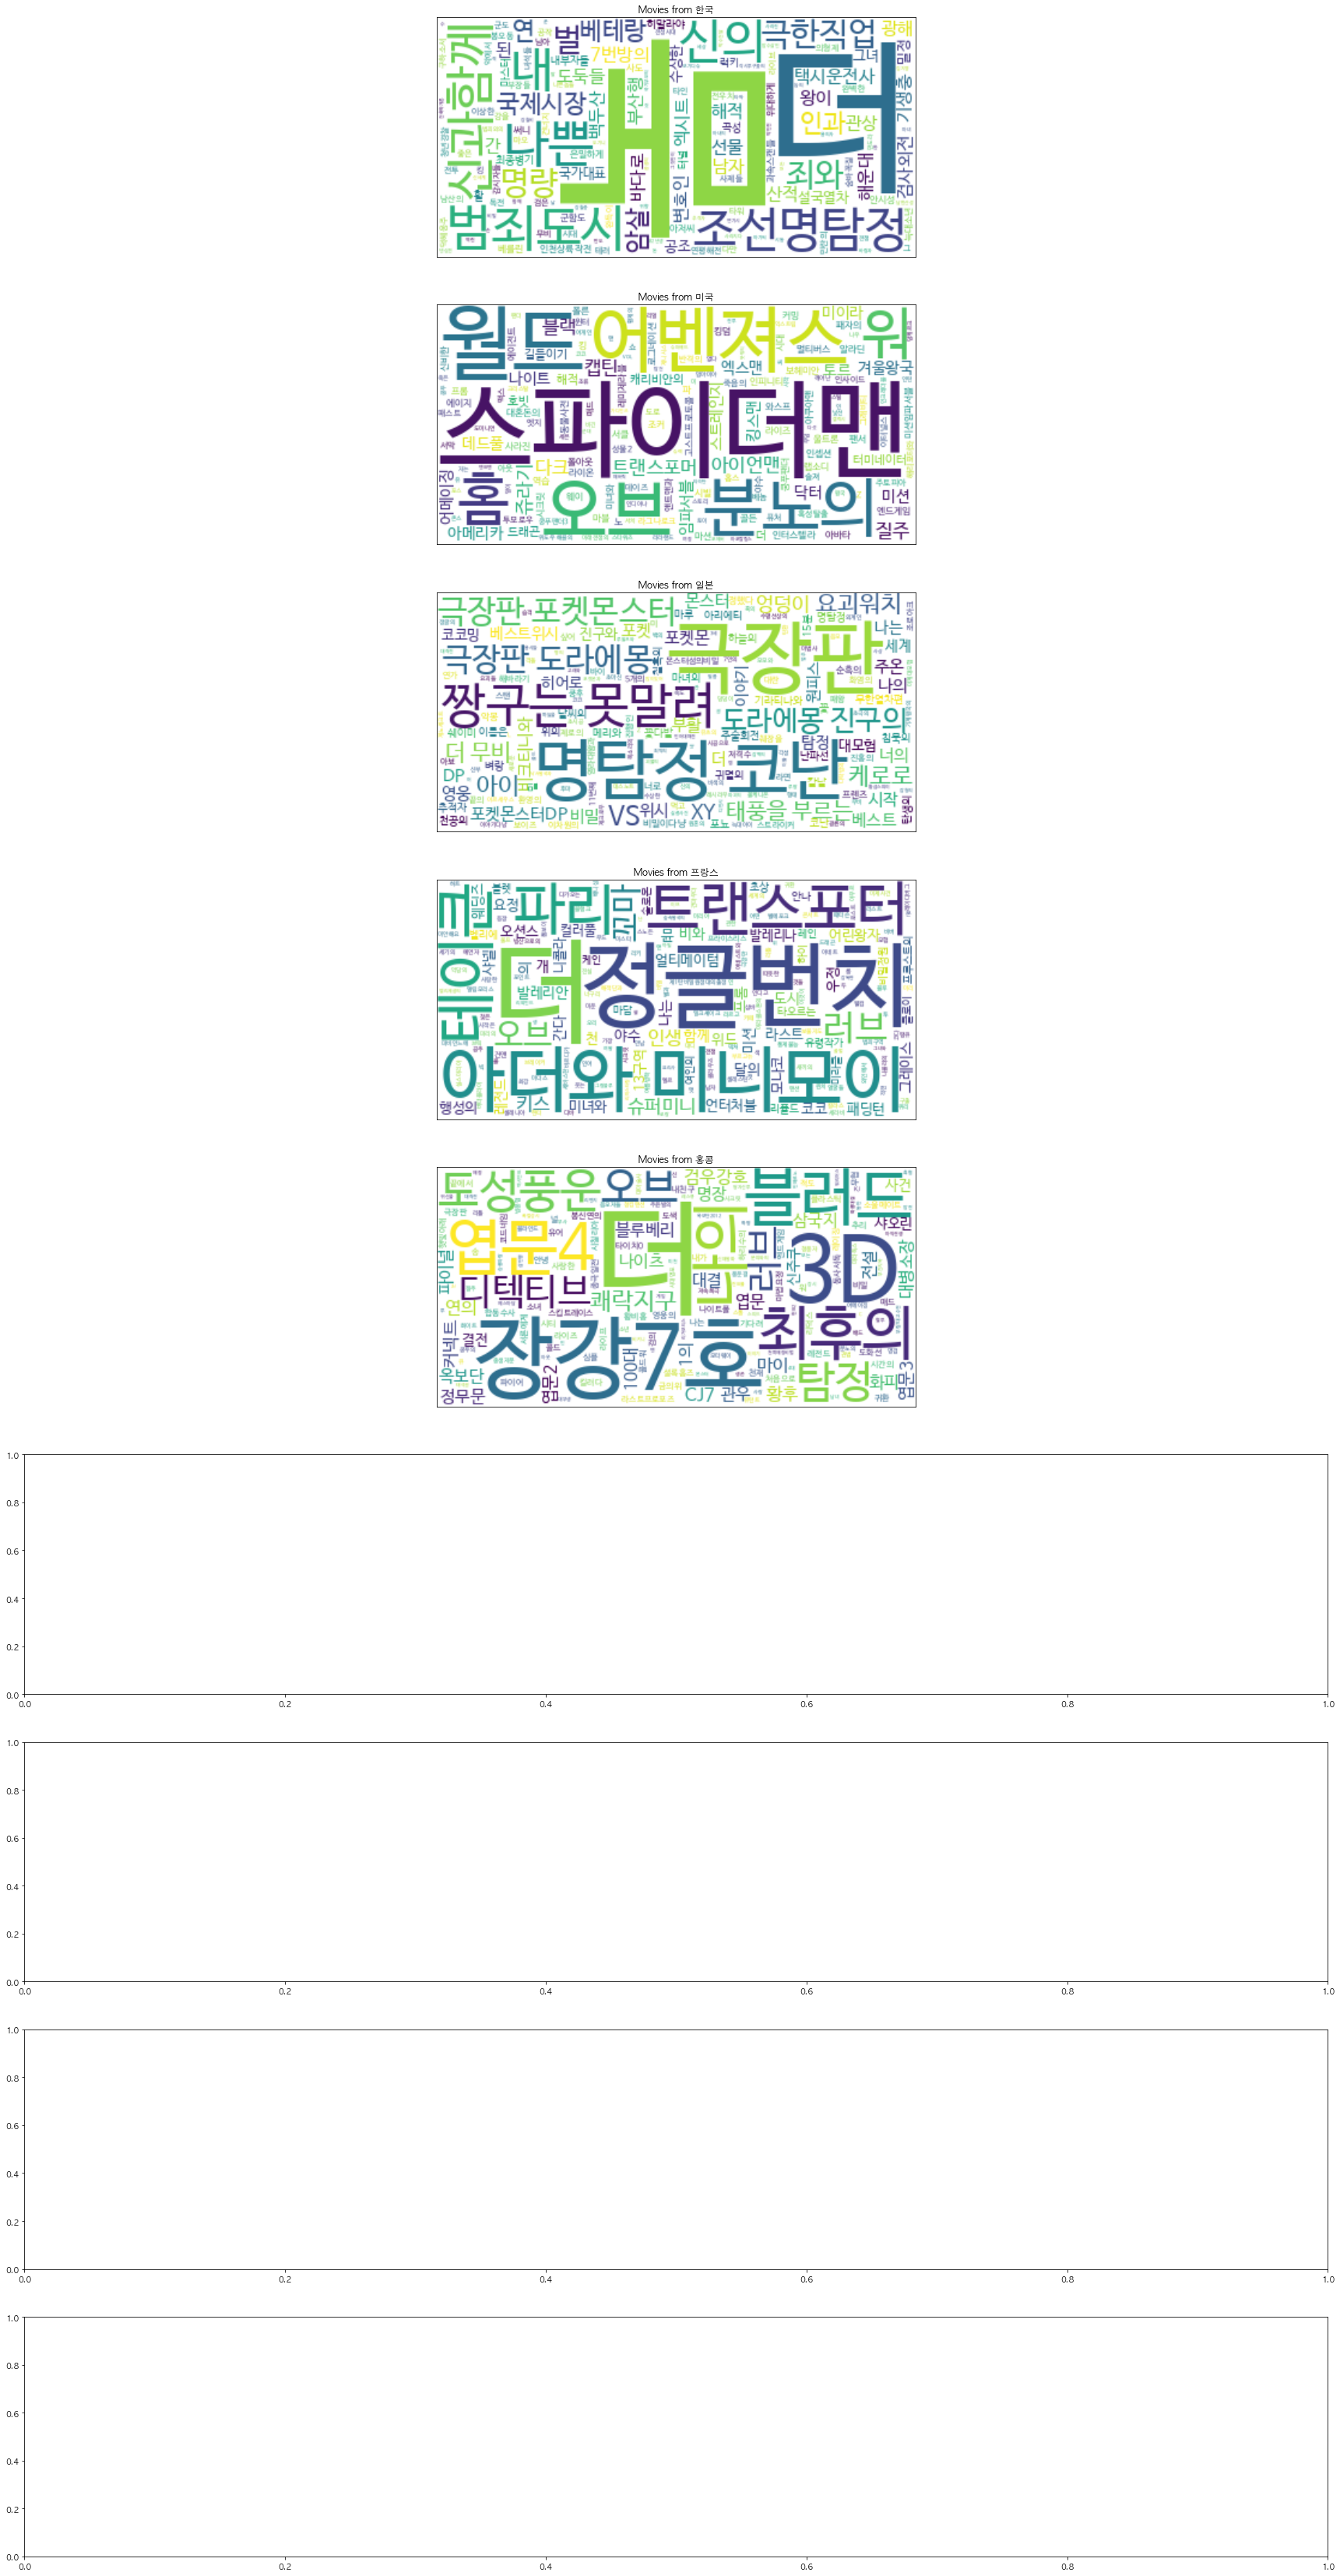

In [19]:
from wordcloud import WordCloud
fig, ax = plt.subplots(nrows=len(countries))
fig.set_size_inches(30,60)
# fig, ax = plt.subplots()
# fig.set_size_inches(20,40)

for i,country in enumerate(countries):
    # data_country=data[data['Nationality']==country]
    # data_country=data_country[['Movie_Name','National_Sales']].sort_values(["National_Sales"], ascending=False).iloc[0:10]
    # sns.barplot(x="Movie_Name", y="National_Sales", data=data_country,ax=ax[i],orient='v')
    # ax[i].set(ylabel='Movies from '+country)
    movie_country=data[data["Nationality"] == country]
    movie_country=movie_country[['Movie_Name','National_Sales']].sort_values('National_Sales',ascending=False).iloc[0:100]
    movie_country=' '.join(movie_country['Movie_Name'].to_list())
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

    word_cloud = WordCloud(collocations = True, background_color = 'white',font_path = font_path).generate(movie_country)

    # plt.imshow(word_cloud, interpolation='bilinear')
    # plt.axis("off")
    # isns.imgplot(word_cloud,orientation="v",ax=ax[i])
    # fig.savefig('wordcloud_'+f'{country}.png',bbox_inches ='tight')
    ax[i].set_title('Movies from '+country)
    ax[i].get_yaxis().set_visible(False)
    ax[i].get_xaxis().set_visible(False)

    # plt.axis('off')

    # plt.axis('off')

    # plt.figure(figsize=(10, 8))
    # ax[i].set_visible('False')
    ax[i].imshow(word_cloud,interpolation='bilinear',origin='upper' )
    # ax[i].set(ylabel='Movies from '+country)
    word_cloud.to_file('wordcloud_'+f'{country}.png')


# yearly changes of movie numbers of top movie countries 

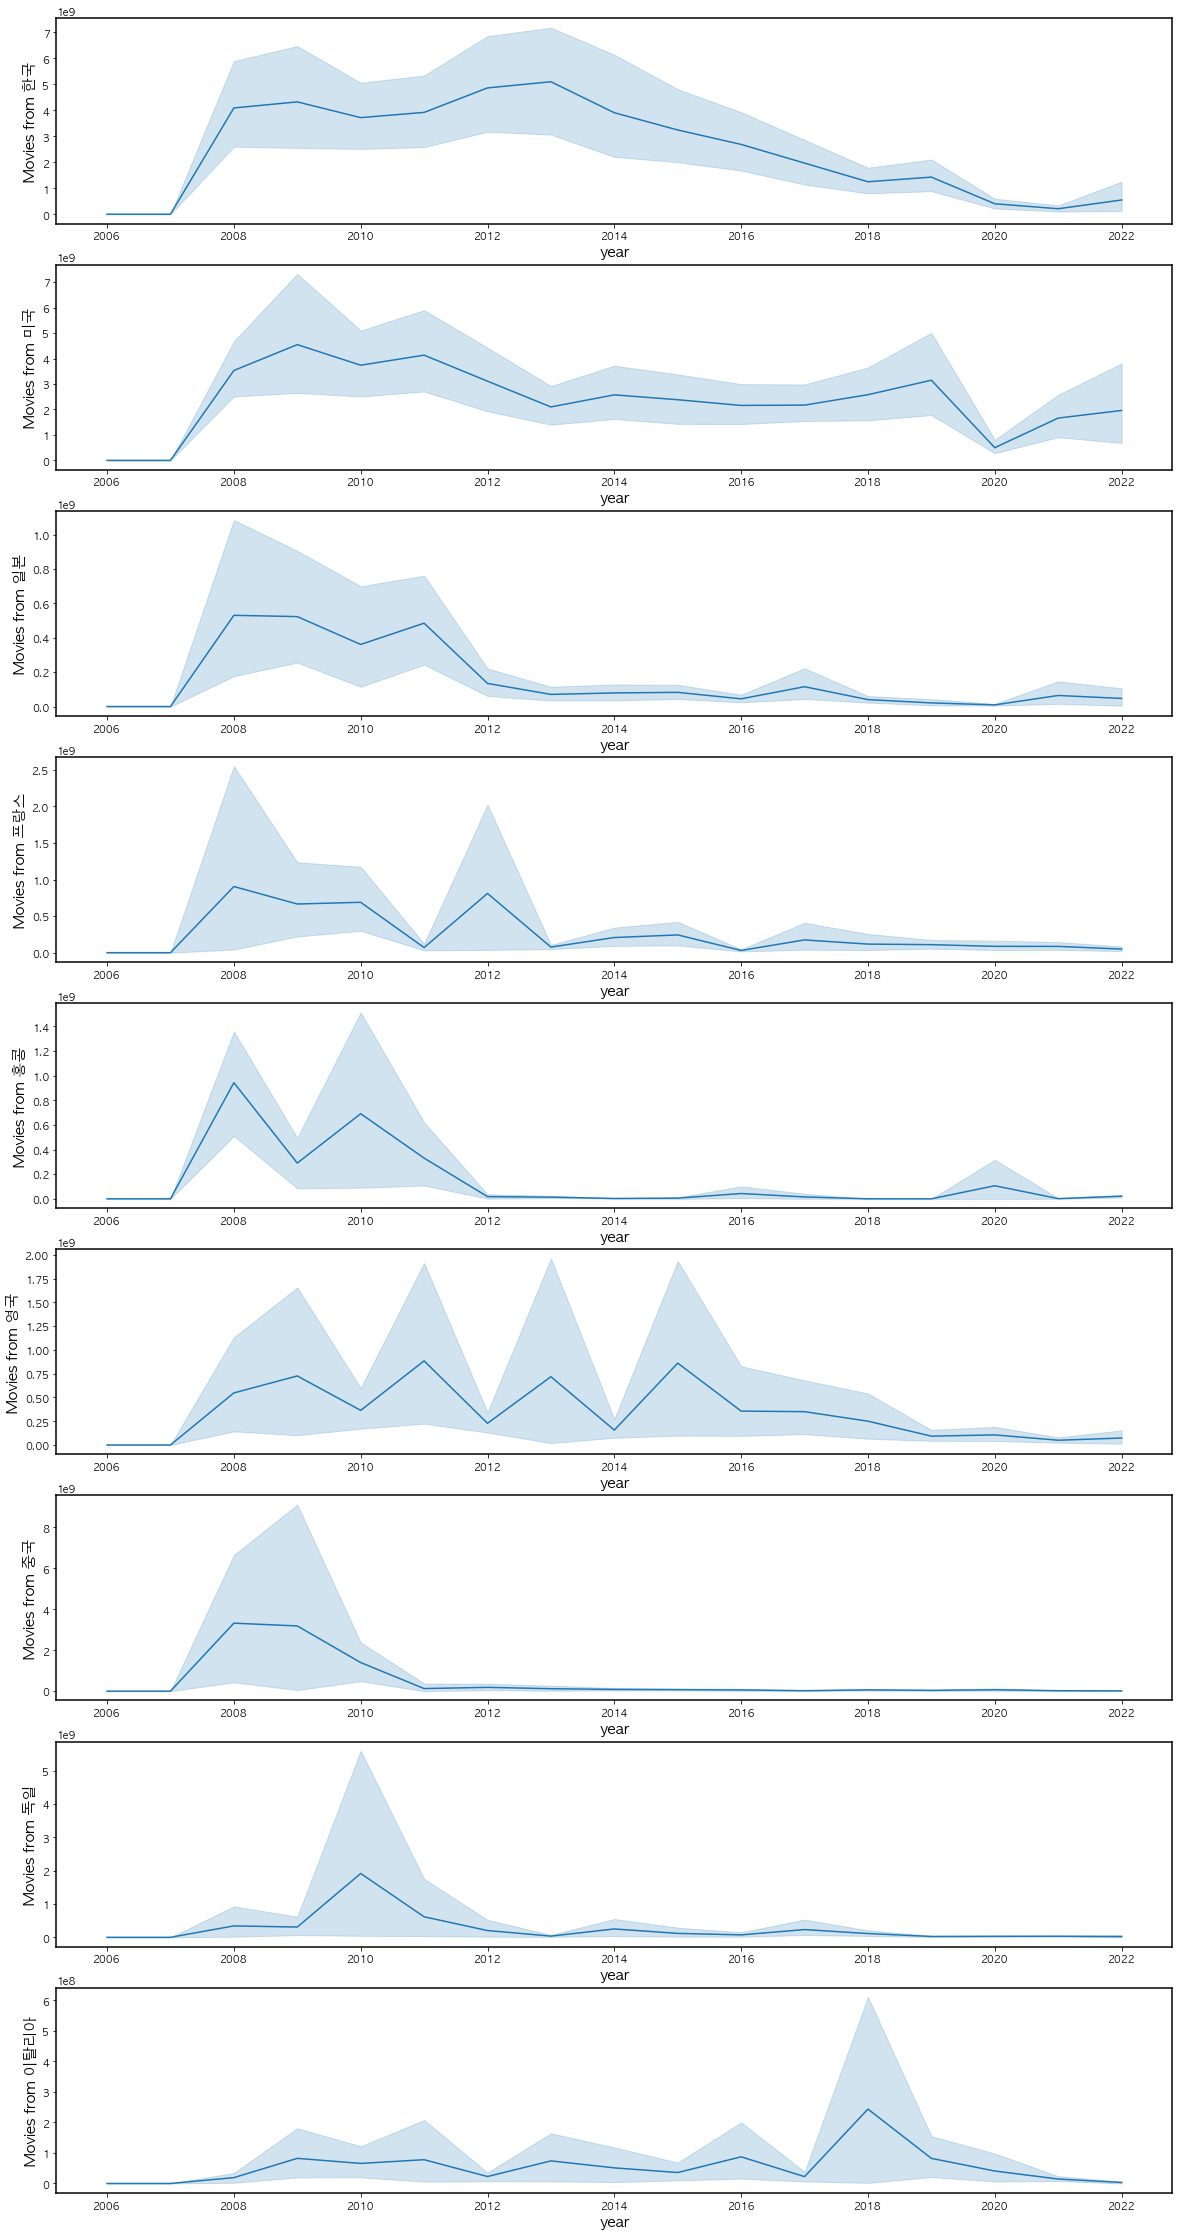

In [ ]:
# ax[6].set(xlabel='Nationality', ylabel='movie quantity')
fig, ax = plt.subplots(nrows=len(countries))
fig.set_size_inches(20,40)

for i,country in enumerate(countries):
    data_country=data[(data['Nationality']==country)& (data["year"] > 2005)]
    # sns.countplot(x='year', data=data_country,order = data_country['year'].value_counts().index,ax=ax[i])
    sns.lineplot(data=data_country, x="year", y="National_Sales",ax=ax[i])

    ax[i].set(ylabel='Movies from '+country)

In [ ]:
# comparing the distribution of movies in different countries

<AxesSubplot:xlabel='year', ylabel='National_Sales'>

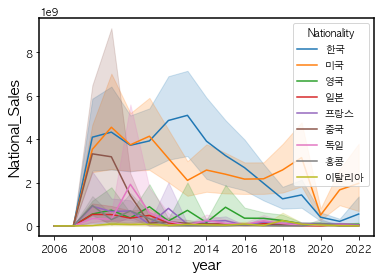

In [ ]:
fig.set_size_inches(20,40)

data_country=data[(data["Nationality"].isin(countries) ) &  (data["year"] > 2005)]
sns.lineplot(data=data_country, x="year", y="National_Sales",hue="Nationality")



In [ ]:
data[(data["Nationality"].isin(countries) )]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화,2014.0,7.0,30.0
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,...,128447097523,13624328,40547523000,3993374,SF,12세이상관람가,독립/예술영화,2009.0,12.0,17.0
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,...,0,12302831,0,3660842,드라마,15세이상관람가,일반영화,2005.0,12.0,29.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화,2019.0,4.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,26192,SP우먼,유호 히토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2012-09-10,개봉영화,장편,일본,...,30000,10,0,0,성인물(에로),청소년관람불가,일반영화,2012.0,9.0,10.0
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",NaN,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,...,300000,75,0,0,공포(호러),청소년관람불가,일반영화,2013.0,8.0,14.0
26194,26195,VIP전용 여자,카네다 사토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,...,8000,1,0,0,성인물(에로),청소년관람불가,일반영화,2016.0,12.0,1.0
26195,26196,VJ의 은밀한 사생활,오카다 히로,NaN,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,...,6000,1,0,0,멜로/로맨스,청소년관람불가,일반영화,2017.0,12.0,25.0


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()